In [1]:
import graphlab


In [3]:
def powers(x,y):
    return x**y


In [4]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name]=powers(feature,power)
    return poly_sframe

In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])

This non-commercial license of GraphLab Create for academic use is assigned to ahmedmagdyno@gmail.com and will expire on February 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\ahmed\AppData\Local\Temp\graphlab_server_1489761454.log.0


In [6]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [7]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.053234     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

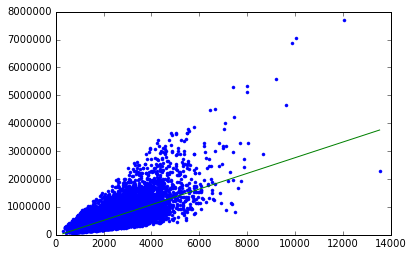

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')

In [68]:
poly1_data2= polynomial_sframe(sales['sqft_living'], 15)
poly1_data2['price'] = sales['price']


In [69]:
model2 = graphlab.linear_regression.create(poly1_data2, target = 'price', features = ['power_15'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.022016     | 6624758.672523     | 366503.484839 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

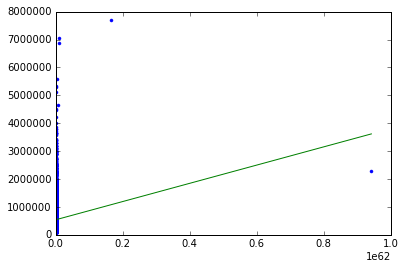

In [70]:
%matplotlib inline
plt.plot(poly1_data2['power_15'],poly1_data['price'],'.',
poly1_data2['power_15'], model2.predict(poly1_data2),'-')

In [34]:
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


In [35]:
set_1,set_2=sales.random_split(0.5,seed=0)

In [36]:
set1_,set_3=set_1.random_split(0.5,seed=0)

In [37]:
set2_,set_4=set_2.random_split(0.5,seed=0)

In [117]:
poly1=polynomial_sframe(set_1['sqft_living'], 15)
data1=poly1.column_names();

In [118]:
poly1['price'] = set_1['price']

In [119]:
poly2=polynomial_sframe(set_2['sqft_living'], 15)
data2=poly2.column_names()
poly2['price'] = set_2['price']

In [120]:
poly3=polynomial_sframe(set_3['sqft_living'], 15)
data3=poly3.column_names()
poly3['price'] = set_3['price']

In [121]:
poly4=polynomial_sframe(set_4['sqft_living'], 15)
data4=poly4.column_names()
poly4['price'] = set_4['price']

In [122]:
model1= graphlab.linear_regression.create(poly1, target = 'price', features =data1, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 10802

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.121080     | 2305941.631349     | 242353.287244 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [123]:
model2= graphlab.linear_regression.create(poly2, target = 'price', features = data2, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 10811

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.165122     | 2418066.642135     | 248530.402238 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [124]:
model3= graphlab.linear_regression.create(poly3, target = 'price', features = data3, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.079052     | 2069212.978547     | 234840.067186 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [125]:
model4= graphlab.linear_regression.create(poly4, target = 'price', features = data4, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.046028     | 2314893.173822     | 244563.136754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [126]:
model1.coefficients

name,index,value,stderr
(intercept),None,88124.8354422,447900.028142
power_1,None,389.990846044,1692.96334821
power_2,None,-0.223774347468,2.23886528771
power_3,None,7.60106563066e-05,nan
power_4,None,-5.95284936384e-09,nan
power_5,None,-4.08629251237e-13,nan
power_6,None,2.11192438553e-17,nan
power_7,None,3.20104223615e-21,nan
power_8,None,1.58181581758e-25,nan
power_9,None,-9.08079248683e-32,nan


In [127]:
model2.coefficients

name,index,value,stderr
(intercept),None,89987.5886981,977020.427411
power_1,None,331.510864107,5191.2796531
power_2,None,-0.124096874733,11.3255047779
power_3,None,1.92007144418e-05,0.0133814101859
power_4,None,6.23073658139e-09,9.54456501368e-06
power_5,None,-7.85504897658e-13,4.39214819371e-09
power_6,None,-1.07335465927e-16,1.45169713478e-12
power_7,None,1.54255269743e-21,4.26057050573e-16
power_8,None,1.21662151407e-24,1.12930373847e-19
power_9,None,1.20733265935e-28,2.19606468931e-23


In [128]:
model3.coefficients

name,index,value,stderr
(intercept),None,89836.5077331,809532.200347
power_1,None,319.806946763,2864.99463972
power_2,None,-0.103315397041,nan
power_3,None,1.06682476069e-05,nan
power_4,None,5.75577097708e-09,nan
power_5,None,-2.54663464734e-13,nan
power_6,None,-1.09641345062e-16,nan
power_7,None,-6.36458441759e-21,nan
power_8,None,5.52560417041e-25,nan
power_9,None,1.35082038959e-28,2.15083351594e-23


In [129]:
model4.coefficients

name,index,value,stderr
(intercept),None,259020.879452,1446254.28681
power_1,None,-31.7277162053,9127.32643549
power_2,None,0.109702769619,23.7942604087
power_3,None,-1.58383847349e-05,0.0337798653805
power_4,None,-4.47660623739e-09,2.88582212116e-05
power_5,None,1.13976573478e-12,1.51610582316e-08
power_6,None,1.97669120543e-16,4.37147098611e-12
power_7,None,-6.15783678766e-21,nan
power_8,None,-4.88012304042e-24,nan
power_9,None,-6.62186781331e-28,nan


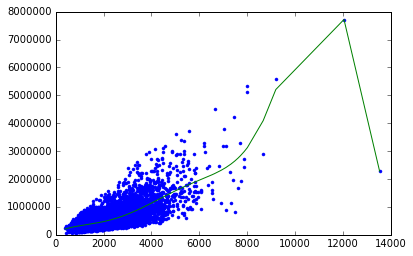

In [130]:
%matplotlib inline
plt.plot(poly1['power_1'],poly1['price'],'.',
poly1['power_1'], model1.predict(poly1),'-')

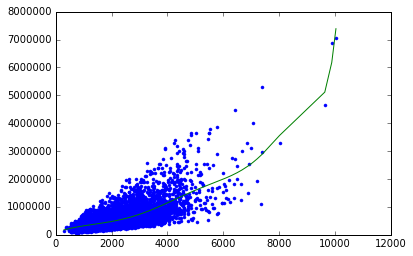

In [132]:
%matplotlib inline
plt.plot(poly2['power_1'],poly2['price'],'.',
poly2['power_1'], model2.predict(poly2),'-')

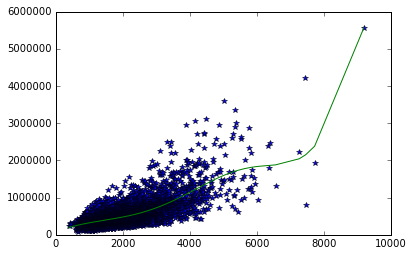

In [133]:
%matplotlib inline
plt.plot(poly3['power_1'],poly3['price'],'*',
poly3['power_1'], model3.predict(poly3),'-')

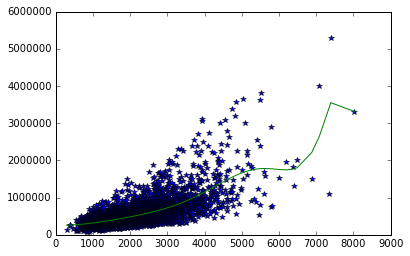

In [134]:
%matplotlib inline
plt.plot(poly4['power_1'],poly4['price'],'*',
poly4['power_1'], model4.predict(poly4),'-')

In [135]:
 training_and_validation ,testing =sales.random_split(.9,seed=1)

In [136]:
training ,validation=training_and_validation.random_split(.5,seed=1)

In [137]:
poly1=polynomial_sframe(training['sqft_living'],1)
data1=poly1.column_names()
poly1['price']=training['price']

In [138]:
poly2=polynomial_sframe(training['sqft_living'],2)
data2=poly2.column_names()
poly2['price']=training['price']

In [139]:
poly3=polynomial_sframe(training['sqft_living'],3)
data3=poly3.column_names()
poly3['price']=training['price']

In [140]:
poly4=polynomial_sframe(training['sqft_living'],4)
data4=poly4.column_names()
poly4['price']=training['price']

In [141]:
poly5=polynomial_sframe(training['sqft_living'],5)
data5=poly5.column_names()
poly5['price']=training['price']

In [142]:
poly6=polynomial_sframe(training['sqft_living'],6)
data6=poly6.column_names()
poly6['price']=training['price']

In [143]:
poly7=polynomial_sframe(training['sqft_living'],7)
data7=poly7.column_names()
poly7['price']=training['price']

In [144]:
poly8=polynomial_sframe(training['sqft_living'],8)
data8=poly8.column_names()
poly8['price']=training['price']

In [145]:
poly9=polynomial_sframe(training['sqft_living'],9)
data9=poly9.column_names()
poly9['price']=training['price']

In [146]:
poly10=polynomial_sframe(training['sqft_living'],10)
data10=poly10.column_names()
poly10['price']=training['price']

In [148]:
poly11=polynomial_sframe(training['sqft_living'],11)
data11=poly11.column_names()
poly11['price']=training['price']

In [153]:
poly12=polynomial_sframe(training['sqft_living'],12)
data12=poly12.column_names()
poly12['price']=training['price']

In [154]:
poly13=polynomial_sframe(training['sqft_living'],13)
data13=poly13.column_names()
poly13['price']=training['price']

In [155]:
poly14=polynomial_sframe(training['sqft_living'],14)
data14=poly14.column_names()
poly14['price']=training['price']

In [156]:
poly15=polynomial_sframe(training['sqft_living'],15)
data15=poly15.column_names()
poly15['price']=training['price']

In [401]:
model1 = graphlab.linear_regression.create(poly1, target = 'price', features = data1, validation_set = None,verbose=False);

In [381]:
model2 = graphlab.linear_regression.create(poly2, target = 'price', features = data2, validation_set = None,verbose=False)

In [382]:
model3 = graphlab.linear_regression.create(poly3, target = 'price', features = data3, validation_set = None,verbose=False);

In [383]:
model4 = graphlab.linear_regression.create(poly4, target = 'price', features = data4, validation_set = None,verbose=False);

In [384]:
model5 = graphlab.linear_regression.create(poly5, target = 'price', features = data5, validation_set = None,verbose=False);

In [385]:
model6 = graphlab.linear_regression.create(poly6, target = 'price', features = data6, validation_set = None,verbose=False);

In [386]:
model7 = graphlab.linear_regression.create(poly7, target = 'price', features = data7, validation_set = None,verbose=False);

In [387]:
model8 = graphlab.linear_regression.create(poly8, target = 'price', features = data8, validation_set = None,verbose=False);

In [388]:
model9 = graphlab.linear_regression.create(poly9, target = 'price', features = data9, validation_set = None,verbose=False);

In [389]:
model10 = graphlab.linear_regression.create(poly10, target = 'price', features = data10, validation_set = None,verbose=False);

In [390]:
model11 = graphlab.linear_regression.create(poly11, target = 'price', features = data11, validation_set = None,verbose=False);

In [391]:
model12 = graphlab.linear_regression.create(poly12, target = 'price', features = data12, validation_set = None,verbose=False);

In [392]:
model13 = graphlab.linear_regression.create(poly13, target = 'price', features = data13, validation_set = None,verbose=False);

In [393]:
model14 = graphlab.linear_regression.create(poly14, target = 'price', features = data14, validation_set = None,verbose=False);

In [394]:
model15 = graphlab.linear_regression.create(poly15, target = 'price', features = data15, validation_set = None,verbose=False);

In [327]:
model1.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [328]:
model2.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [329]:
model3.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [330]:
model4.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [331]:
model5.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [332]:
model6.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [333]:
model6.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [334]:
model7.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [335]:
model8.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [336]:
model9.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [337]:
model10.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [338]:
model11.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [339]:
model12.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [340]:
model13.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [341]:
model14.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [342]:
model15.evaluate(validation)

{'max_error': 7160970.694498513, 'rmse': 371253.65197377297}

In [189]:
data1

['power_1']

In [190]:
data2

['power_1', 'power_2']

In [191]:
poly1


power_1,price
384.0,265000.0
390.0,245000.0
460.0,247000.0
470.0,156000.0
470.0,192500.0
480.0,170000.0
500.0,125000.0
520.0,275000.0
520.0,310000.0
520.0,330000.0


In [192]:
poly2

power_1,power_2,price
384.0,147456.0,265000.0
390.0,152100.0,245000.0
460.0,211600.0,247000.0
470.0,220900.0,156000.0
470.0,220900.0,192500.0
480.0,230400.0,170000.0
500.0,250000.0,125000.0
520.0,270400.0,275000.0
520.0,270400.0,310000.0
520.0,270400.0,330000.0


In [193]:
model5.coefficients

name,index,value,stderr
(intercept),None,381532.919363,39938.5876956
power_1,None,-214.24944992,65.8856512901
power_2,None,0.190674026776,0.037586405223
power_3,None,-3.75465887253e-05,9.21038362355e-06
power_4,None,4.38536259295e-09,9.64846697558e-10
power_5,None,-1.84966053577e-13,3.4491949008e-14


In [194]:
model2.coefficients

name,index,value,stderr
(intercept),None,147822.568657,10320.6419393
power_1,None,115.415214461,7.57323236995
power_2,None,0.0296646114018,0.00125162597797


In [195]:
poly1

power_1,price
384.0,265000.0
390.0,245000.0
460.0,247000.0
470.0,156000.0
470.0,192500.0
480.0,170000.0
500.0,125000.0
520.0,275000.0
520.0,310000.0
520.0,330000.0


In [196]:
poly2

power_1,power_2,price
384.0,147456.0,265000.0
390.0,152100.0,245000.0
460.0,211600.0,247000.0
470.0,220900.0,156000.0
470.0,220900.0,192500.0
480.0,230400.0,170000.0
500.0,250000.0,125000.0
520.0,270400.0,275000.0
520.0,270400.0,310000.0
520.0,270400.0,330000.0


In [197]:
poly11

power_1,power_2,power_3,power_4,power_5,power_6,power_7
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
460.0,211600.0,97336000.0,44774560000.0,2.05962976e+13,9.474296896e+15,4.35817657216e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
480.0,230400.0,110592000.0,53084160000.0,2.54803968e+13,1.2230590464e+16,5.87068342272e+18
500.0,250000.0,125000000.0,62500000000.0,3.125e+13,1.5625e+16,7.8125e+18
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19


In [198]:
data11

['power_1',
 'power_2',
 'power_3',
 'power_4',
 'power_5',
 'power_6',
 'power_7',
 'power_8',
 'power_9',
 'power_10',
 'power_11']

In [199]:
model1.summary

<bound method LinearRegression.summary of Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 9761
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.023

Settings
--------
Residual sum of squares        : 6.7164679183e+14
Training RMSE                  : 262315.1149

Highest Positive Coefficients
-----------------------------
power_1                        : 282.176

Lowest Negative Coefficients
----------------------------
(intercept)                    : -45052.3458
>

In [204]:
newSFrame = graphlab.SFrame()

In [ ]:
for i in range(1,16):
    name='model'+str(i)
    name.predict(validation)


In [205]:
l=list()

In [206]:
l.append(model1)

In [208]:
l.append(model2)

In [209]:
l.append(model3)

In [210]:
l.append(model4)

In [211]:
l.append(model5)

In [212]:
l.append(model6)

In [213]:
l.append(model7)

In [214]:
l.append(model8)

In [215]:
l.append(model9)

In [216]:
l.append(model10)

In [217]:
l.append(model11)

In [218]:
l.append(model15)

In [219]:
l.pop()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 16
Number of examples             : 9761
Number of feature columns      : 15
Number of unpacked features    : 15

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.1401

Settings
--------
Residual sum of squares        : 5.93922444178e+14
Training RMSE                  : 246670.783

Highest Positive Coefficients
-----------------------------
(intercept)                    : 115895.6082
power_1                        : 317.9682
power_3                        : 0.0001
power_6                        : 0.0
power_7                        : 0.0

Lowest Negative Coefficients
----------------------------
power_2                       

In [229]:
l[1]

Class                          : LinearRegression

Schema
------
Number of coefficients         : 3
Number of examples             : 9761
Number of feature columns      : 2
Number of unpacked features    : 2

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.027

Settings
--------
Residual sum of squares        : 6.35088160298e+14
Training RMSE                  : 255076.1491

Highest Positive Coefficients
-----------------------------
(intercept)                    : 147822.5687
power_1                        : 115.4152
power_2                        : 0.0297

Lowest Negative Coefficients
----------------------------
No Negative Coefficients       : 

In [343]:
li=list()

In [344]:
li.append(model1)

In [345]:
li.append(model2)

In [346]:
li.append(model3)

In [347]:
li.append(model4)

In [348]:
li.append(model5)

In [349]:
li.append(model6)

In [350]:
li.append(model7)

In [351]:
li.append(model8)

In [352]:
li.append(model9)

In [353]:
li.append(model10)

In [354]:
li.append(model11)

In [355]:
li.append(model12)

In [356]:
li.append(model13)

In [357]:
li.append(model14)

In [358]:
li.append(model15)

In [247]:
model1

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 9761
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.023

Settings
--------
Residual sum of squares        : 6.7164679183e+14
Training RMSE                  : 262315.1149

Highest Positive Coefficients
-----------------------------
power_1                        : 282.176

Lowest Negative Coefficients
----------------------------
(intercept)                    : -45052.3458

In [359]:
p=list()

In [360]:
for i in range(0,15):
    name='model'+str(i)
    p.append(((validation['price']-(li[i].predict(validation)))**2).sum())

In [361]:
p

[1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5,
 1327985055990722.5]

In [362]:
((testing['price']-(model1.predict(testing)))**2).sum()

252901572839579.4

In [363]:
((testing['price']-(model2.predict(testing)))**2).sum()

252901572839579.4

In [364]:
((testing['price']-(model3.predict(testing)))**2).sum()

252901572839579.4

In [365]:
((testing['price']-(model4.predict(testing)))**2).sum()

252901572839579.4

In [366]:
((testing['price']-(model5.predict(testing)))**2).sum()

252901572839579.4

In [367]:
((testing['price']-(model6.predict(testing)))**2).sum()

252901572839579.4

In [368]:
((testing['price']-(model7.predict(testing)))**2).sum()

252901572839579.4

In [369]:
((testing['price']-(model8.predict(testing)))**2).sum()

252901572839579.4

In [370]:
((testing['price']-(model9.predict(testing)))**2).sum()

252901572839579.4

In [371]:
((testing['price']-(model10.predict(testing)))**2).sum()

252901572839579.4

In [372]:
((testing['price']-(model11.predict(testing)))**2).sum()

252901572839579.4

In [373]:
((testing['price']-(model12.predict(testing)))**2).sum()

252901572839579.4

In [374]:
((testing['price']-(model13.predict(testing)))**2).sum()

252901572839579.4

In [375]:
((testing['price']-(model14.predict(testing)))**2).sum()

252901572839579.4

In [376]:
((testing['price']-(model15.predict(testing)))**2).sum()

252901572839579.4

In [377]:
((testing['price']-(model1.predict(testing)))**2).sum()

252901572839579.4

In [378]:
((testing['price']-(model11.predict(testing)))**2).sum()

252901572839579.4

In [308]:
model11 = graphlab.linear_regression.create(poly11, target = 'price', features = data11, validation_set = None);

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 11

Number of unpacked features : 11

Number of coefficients    : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.060040     | 2534201.088398     | 246675.476971 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [395]:
model1.predict(testing)

dtype: float
Rows: 2217
[539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029.3055014873, 539029

In [396]:
model2.predict(testing)

dtype: float
Rows: 2217
[539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029.3055014861, 539029

In [397]:
model5.predict(testing)

dtype: float
Rows: 2217
[539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029.3055014834, 539029

In [398]:
poly1

power_1,price
384.0,265000.0
390.0,245000.0
460.0,247000.0
470.0,156000.0
470.0,192500.0
480.0,170000.0
500.0,125000.0
520.0,275000.0
520.0,310000.0
520.0,330000.0


In [399]:
training

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444,1,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000,1,0
1352300580,2014-11-14 00:00:00+00:00,247000.0,1.0,1.0,460.0,4120,1,0
8655900162,2015-02-19 00:00:00+00:00,156000.0,1.0,0.75,470.0,15000,1,0
1320069249,2014-10-20 00:00:00+00:00,192500.0,1.0,1.0,470.0,63737,1,0
7849202585,2014-09-04 00:00:00+00:00,170000.0,1.0,1.0,480.0,4560,1,0
0859000110,2014-10-02 00:00:00+00:00,125000.0,1.0,1.0,500.0,7440,1,0
1773101530,2014-12-18 00:00:00+00:00,275000.0,1.0,1.0,520.0,4800,1,0
7588700177,2015-04-20 00:00:00+00:00,310000.0,1.0,0.75,520.0,2885,1,0
4391600065,2014-08-14 00:00:00+00:00,330000.0,2.0,0.75,520.0,6862,1,0
